## 1. Connexion à la base de données

In [1]:
import pandas as pd
import database
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = database.main()
df.drop_duplicates(keep='first', inplace=True)
# Load keywords from a CSV file without headers
keywords_df = pd.read_csv('skills.csv', header=None)  # Replace 'skills.csv' with your file path
keyword_list = keywords_df[0].tolist()

# Function to find keywords in the description
def find_keywords(description, skills_list):
    contained_skills = []
    for skill in skills_list:
        # Create a regex pattern that matches the skill with word boundaries
        pattern = r'\b' + re.escape(skill) + r'\b'
        if re.search(pattern, description, re.IGNORECASE):
            contained_skills.append(skill)
    if len(contained_skills) == 0:
        return None
    else:
        return ', '.join(contained_skills)

# Apply the function to create the new column
df['skills'] = df['description'].apply(lambda desc: find_keywords(desc, keyword_list))
df.head()

,title,company,description,location,via,extensions,employment_type,work_mode,posting_date,degree_requirement,salary,posted_at_timestamp,skills
0,Data Analyst internship,PGBPGNGLOBAL,,"Paris, France",via PG Careers,"{""Full-time and Internship""}",Full-time and Internship,None,None,None,None,NaT,None
1,Senior Data Analyst H/F,Qonto,Les missions du poste\n\nOur mission? Making d...,Anywhere,via HelloWork,"{""9 hours ago"",""Work from home"",Full-time,""9 h...",Full-time,Work from home,9 hours ago,None,None,2024-02-13 01:54:19.019501,"sql, python, go, snowflake, airflow, tableau"
2,Data Analyst,Jump,"Pour relever ces défis, nous recrutons un·e Da...","Paris, France",via Welcome To The Jungle,"{""18 hours ago"",Full-time,""18 hours ago"",Full-...",Full-time,None,18 hours ago,None,None,2024-02-12 16:54:19.019501,None
3,Data analyst,Oh BiBi,Job Description:\n\nAs a Data Analyst at OhBiB...,"Paris, France",via Indeed,"{""4 days ago"",Full-time,""4 days ago"",Full-time}",Full-time,None,4 days ago,None,None,2024-02-09 10:54:19.019501,"sql, python, aws, redshift, looker"
4,Product Data Analyst,leboncoin,"The right career for all\n\nCreated in 2006, l...","Paris, France",via LinkedIn,"{""24 hours ago"",Full-time,""No degree mentioned...",Full-time,None,24 hours ago,No degree mentioned,None,2024-02-12 10:54:19.019501,"sql, python"


In [2]:
# Function to parse and standardize salary
def standardize_salary(salary):
    if salary is None:
        return None
    
    # Find all numbers in the salary string
    numbers = [float(num.replace('K', '000')) for num in re.findall(r'[\d.]+K?|[\d,]+', salary.replace(',', ''))]
    
    # Determine the salary period and calculate annual salary
    if 'a month' in salary:
        annual_salary = int(sum(numbers) / len(numbers) * 12) # Average if a range, then convert to annual
    elif 'a day' in salary:
        annual_salary = int(sum(numbers) / len(numbers) * 220)  # Average if a range, then convert to annual
    elif 'a year' in salary:
        annual_salary = int(sum(numbers) / len(numbers))  # Average if a range
    else:
        annual_salary = None  # Undefined period
    
    return annual_salary

# Apply the function to each salary
df['salary_standardized'] = [standardize_salary(s) for s in df.salary]
# Filter out rows with no salary
df_salary = df[df['salary_standardized'].notnull()]
df_salary

,title,company,description,location,via,extensions,employment_type,work_mode,posting_date,degree_requirement,salary,posted_at_timestamp,skills,salary_standardized
6,Data Analyst Intern,Data&Data,Data&Data leverages artificial intelligence to...,"Paris, France",via Wellfound,"{""18 days ago"",""€8K–€18K a year"",Internship,""1...",Internship,None,18 days ago,None,€8K–€18K a year,2024-01-26 10:54:19.019501,"sql, python, r",13000.0
24,Data Analyst(f/m/d),wefox,wefox is a world-leading insurtech company dri...,"Paris, France",via Ai-Jobs.net,"{""12 days ago"",""65,750–105,000 a year"",""Full-t...",Full-time and Temp work,None,12 days ago,None,"65,750–105,000 a year",2024-02-01 10:54:19.019501,"sql, python, snowflake, airflow",85375.0
38,Data Analyst,Procter & Gamble,Job LocationParisJob DescriptionAre you energi...,"Asnières-sur-Seine, France",via Ai-Jobs.net,"{""4 days ago"",""71K–112K a year"",Full-time,""4 d...",Full-time,None,4 days ago,None,71K–112K a year,2024-02-09 10:54:19.019501,"sql, python",91500.0
41,Data Intelligence Analyst,Ralph Lauren,Ralph Lauren Corporation (NYSE:RL) is a global...,"Paris, France",via Karkidi,"{""€75K–€120K a year"",Full-time,""No degree ment...",Full-time,None,None,No degree mentioned,€75K–€120K a year,NaT,None,97500.0
45,Data Analyst H/F,EPSA,Description de l'entrepriseEPSA Market Place e...,"Paris, France",via Ai-Jobs.net,"{""24 days ago"",""68K–112K a year"",""Full-time an...",Full-time and Temp work,None,24 days ago,None,68K–112K a year,2024-01-20 10:57:02.851770,excel,90000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6435,Data Analyst | POEI,DataScientest,LE POSTE\n\nEn tant que Data Analyst vous sere...,"Paris, France",via Glassdoor,"{""5 days ago"",""€33K–€50K a year"",Full-time,""5 ...",Full-time,None,5 days ago,None,€33K–€50K a year,2024-03-31 17:22:30.515702,python,41500.0
6438,Data Analyst (Intern)- French speaking,MakiPeople,👪 About the Operations team\n\nYou will be joi...,"Paris, France",via Welcome To The Jungle,"{""10 days ago"",""€1.4K a month"",Internship,""10 ...",Internship,None,10 days ago,None,€1.4K a month,2024-03-26 17:22:30.515702,"postgresql, bigquery",16.0
6441,Consultant·e Data Analyst Big Query / Power BI...,Saegus,"Ainsi, nous recrutons un.e Consultant·e Data A...","Paris, France",via Welcome To The Jungle,"{""1 month ago"",""€48K–€60K a year"",Full-time,""1...",Full-time,None,1 month ago,None,€48K–€60K a year,2024-04-05 16:22:30.515702,power bi,54000.0
6454,Alternance - Chef de projet Data Analyst F/H,AEROPORTS DE PARIS,"Le Groupe ADP, un des leaders mondiaux de l'aé...","Louvres, France",via Talent.com,"{""15 hours ago"",""€5K a month"",Full-time,""15 ho...",Full-time,None,15 hours ago,None,€5K a month,2024-04-05 02:22:30.515702,None,60000.0


## 2. Salaire median pour les 5 compétences les plus demandées

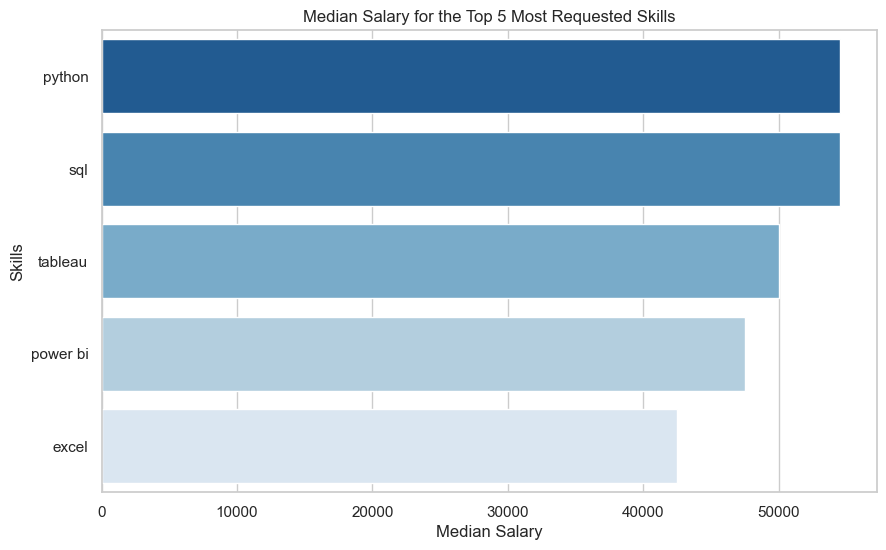

In [3]:
df_exploded = df.assign(skills=df.skills.str.split(", ")).explode('skills')

# Count the occurrence of each skill and get the top 5
top_skills = df_exploded['skills'].value_counts().head(5).index

# Filter for rows that have one of the top 5 skills
top_skills_df = df_exploded[df_exploded['skills'].isin(top_skills)]

# Calculate median salary for each of the top skills
median_salaries = top_skills_df.groupby('skills')['salary_standardized'].median().reset_index().sort_values(by='salary_standardized', ascending=False)

# Plotting the median salaries using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='salary_standardized', y='skills', data=median_salaries, palette="Blues_r")

plt.title('Median Salary for the Top 5 Most Requested Skills')
plt.xlabel('Median Salary (€)')
plt.ylabel('Skills')

plt.show()

## Median Salary by Skill

- Python commands the highest median salary among the top 5 skills, indicating it's highly valued in the market.
- SQL and Tableau also have high median salaries, suggesting that database management and data visualization skills are profitable.
- Power BI and Excel have lower median salaries compared to Python, SQL, and Tableau, which may reflect their market ubiquity or a lower barrier to entry.

## 3. Ratio demande/salaire pour les compétences

In [4]:
# Step 1: Calculate frequency of each skill
skill_frequency = df_exploded['skills'].value_counts()

# Step 2: Calculate median salary for each skill
median_salary = df_exploded.groupby('skills')['salary_standardized'].median()

# Combine frequency and median salary into a single DataFrame
skills_data = pd.DataFrame({
    'frequency': skill_frequency,
    'median_salary': median_salary
})

# Step 3: Normalize the data
# Normalize by subtracting the min and dividing by the range
skills_data['frequency_normalized'] = (skills_data['frequency'] - skills_data['frequency'].min()) / (skills_data['frequency'].max() - skills_data['frequency'].min())
skills_data['median_salary_normalized'] = (skills_data['median_salary'] - skills_data['median_salary'].min()) / (skills_data['median_salary'].max() - skills_data['median_salary'].min())

# Step 4: Score each skill
# Here we simply average the normalized frequency and normalized median salary, but you can adjust the weighting
skills_data['score'] = (skills_data['frequency_normalized'] + skills_data['median_salary_normalized']) / 2

# Sort the skills by their score in descending order to identify the top skills
top_skills_by_score = skills_data.sort_values(by='score', ascending=False)

top_skills_by_score = top_skills_by_score.head(10)

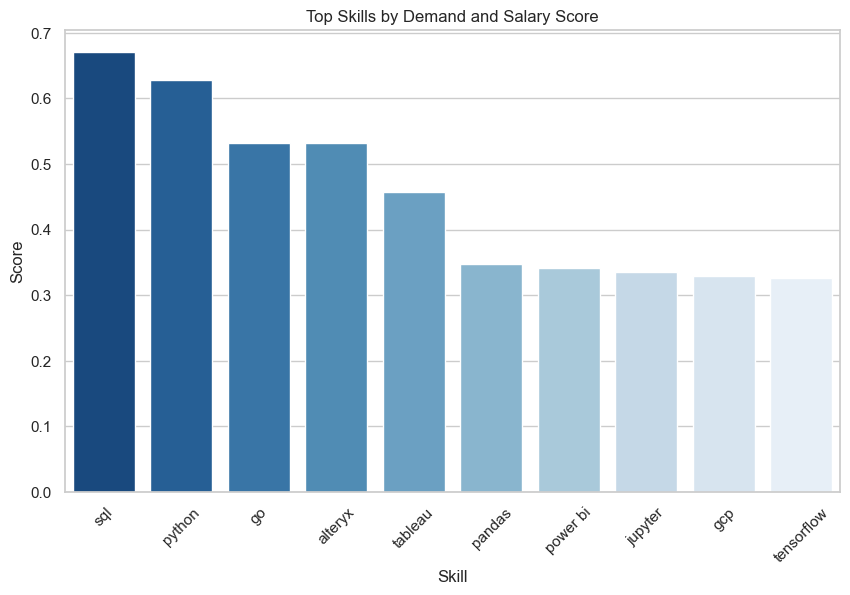

In [5]:
# Plotting the top skills by their score as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=skills_data.index, y='score', data=skills_data, order=top_skills_by_score.index, palette="Blues_r")
plt.title('Top Skills by Demand and Salary Score')
plt.xlabel('Skill')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

## Demand and Salary Score by Skill

- SQL and Python have the highest combined demand and salary scores, reinforcing their status as the most sought-after skills.
- Go and AlteryX follow but with a slight drop, indicating good marketability but less so than SQL and Python.
- Tableau, while commanding a high median salary, has a lower demand and salary score compared to the highest ones.
- Skills like Pandas, Power BI, Jupyter, GCP, and TensorFlow have lower scores, possibly due to a more specific application or a greater supply of professionals with these skills.

## Overall Insights

- Python is likely the most lucrative skill to develop, given its leading position in both median salary and demand/salary score.
- SQL's strong performance in both analyses suggests it's essential for high-earning potential in tech and data roles.
- The difference in median salaries between Python and Power BI or Excel could suggest Python skills are in shorter supply or require more expertise.
- The drop in scores for highly specialized skills (like GCP and TensorFlow) versus foundational skills (like SQL and Python) might indicate that generalist skills are more universally in demand across various job postings.